## 2. Supervised Learning
#### Regression vs Classification
Repetition:
Supervised learning problems can be sub-divided into regression and classification problems.

**Regression** covers situations where **y is continuous/numerical**. 
- Predicting the value of the Dow in 6 months.
- Predicting the price of a given house based on various inputs.

**Classification** covers situations where **y is categorical**
- Will the Dow be up (U) or down (D) in 6 months?
- Is this email a SPAM or not?


### 2.1 Regression
- Linear regression is a simple approach to supervised learning
- Only **Simple Linear Regression** assumes a linear dependence of Y on $X_1, X_2, ... X_n$
- Linear Regression is very useful (conceptually and practically)

![adv](../img/2/advertise.png)
source: [ISLR](http://www-bcf.usc.edu/~gareth/ISL/)

Questions linear regression can help us to answer:
1. Is there a relationship between advertising budget and sales? 
2. How strong is the relationship between advertising budget and sales? 
3. Which factors (media) contribute to sales?
4. How accurately can we estimate the effect of each medium on sales? 
5. How accurately can we predict future sales?
6. Is the relationship linear?
7. Is there synergy among the advertising media?

#### 2.1.1 Simple Linear Regression
Simple linear regression assumes there is a linear relationship between x and y.
$$ y = \beta_{0}  + \beta_{1} x $$

<img src="../img/2/simple_linear_slope.png" width=600>

Let's gererate some random data for regression analysis

<IPython.core.display.Javascript object>


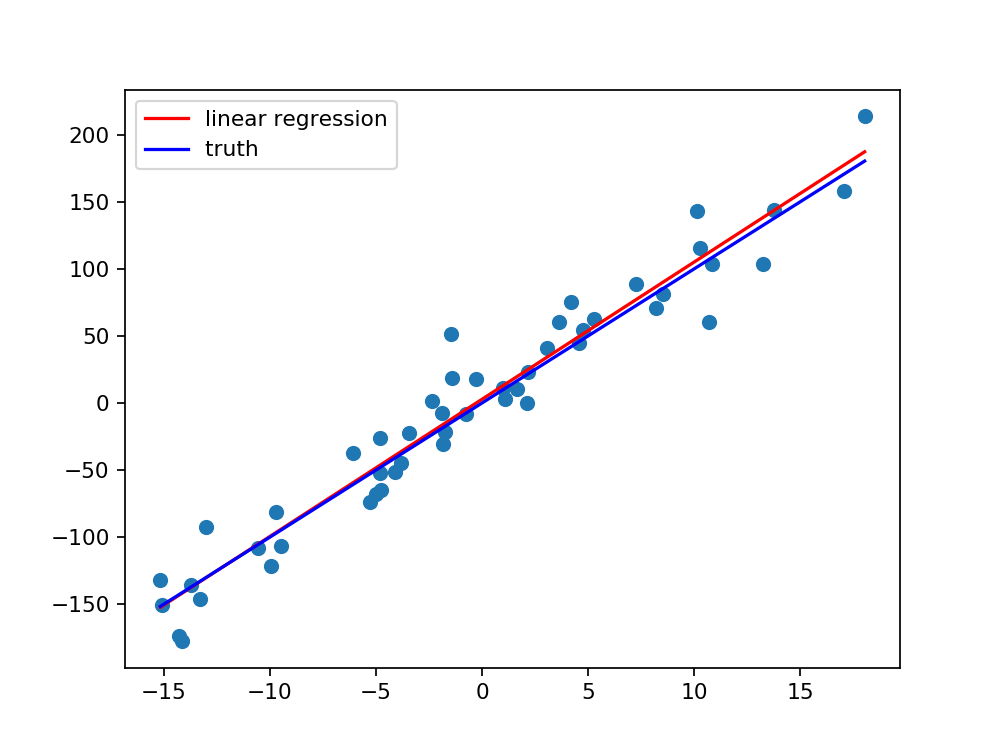

slope:
  true: 10  model:  10.228483597707376
intercept:
  true: 0  model:  2.8025162243742088
R-squared:  0.9447646533896046


In [6]:
%matplotlib notebook
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
import numpy as np
import random

# generate random data from a line adding some noise
def generate_regr(n_samples, x_mean, x_std, m, b, y_noise):
    x, y = list(), list()
    for i in range(n_samples):
        x0 = random.gauss(x_mean, x_std)
        y0 = m * x0 + b + (random.gauss(0, y_noise))
        x.append(x0)
        y.append(y0)
    return np.array([x]).transpose(), y

m, b, noise = 10, 0, 25
X, y = generate_regr(50, 0, 10, m, b, noise)

# plot dataset
pyplot.close()
pyplot.scatter(X,y)

# ----------- create a model and fit it to the data ----------
regr_model = LinearRegression()
regr_model.fit(X, y)

# regression line
xl = np.linspace(min(X), max(X), 100)
yl = regr_model.coef_[0] * xl + regr_model.intercept_
yt= m * xl + b

pyplot.plot(xl, yl, '-r', label='linear regression')
pyplot.plot(xl, yt, '-b', label='truth ')
pyplot.legend(loc='upper left')
pyplot.show()

print("slope:")
print("  true:", m, " model: ", regr_model.coef_[0])
print("intercept:")
print("  true:", b, " model: ", regr_model.intercept_)

print("R-squared: ", regr_model.score(X, y))


##### How does this work?

The optimization algorithm tries to find a line for which the **distance of the data points (residuals)** to this line is minimized. The way to *'punish'* this distance is called a **cost function**.

![residuals](../img/2/residuals.png)

source: [ISLR](http://www-bcf.usc.edu/~gareth/ISL/)


There are different **cost funtions** to pick from 
- RSS: Residual Sum of Squares
$$  \sum_i (y_i - \hat{y}_i)^2 $$

- MAE: Mean Absolut Error
$$ \frac{1}{n} \sum_i |y_i - \hat{y}_i| $$
is the easiest to understand, because it's the average error.


- MSE: Mean Squared Error
$$ \frac{1}{n} \sum_i (y_i - \hat{y}_i)^2 $$

- RMSE Rooted MSE
$$ \sqrt{MSE}$$
is even more popular than MSE, because RMSE is interpretable in the "y" units.

##### Estimating Coefficients

The algorithm goes through different combintions of the coefficients ($ \beta_{0} ,  \beta_{1}  $) and picks the one with the lowest cost.

$$ y = \beta_{0}  + \beta_{1} x $$

![estimating coefficients](../img/2/coef_estimation.png)
source: [ISLR](http://www-bcf.usc.edu/~gareth/ISL/)

![gradient decent](../img/2/gradient_decent.gif)
source: [Towards Data Science](https://towardsdatascience.com/machine-learning-fundamentals-via-linear-regression-41a5d11f5220)



**Gradient Decent** is an algorithm that is used to *go down the slope* to find the minimal cost.
When using a quadratic cost function (RSS or MSE), we can be sure there is just a single minimum.


Linear regression is called linear, not because we are fitting a line, but because with gradient decent we can linearly progress towards the minimal cost.

**R-squared**: an unit-independant meassure of model quality

$$ R^2 = 1 - \frac{\sum_i (\hat{y}_i - y_i)^2}{\sum_i (\hat{y}_i - \mu)^2}$$

$R^2 $: The coefficient of determination, pronounced "R squared", is the proportion of the variance in the dependent variable that is predictable from the independent variables.

#### 2.1.2 Multiple Linear Regression

Multiple linear regression attempts to model the relationship between **two or more explanatory variables** and a response variable by fitting a linear equation to observed data. 

$$ y = \beta_{0}  + \beta_{1} x_{1} + \beta_{2} x_{2} + ... +  \beta_{n} x_{n} $$

By estimating coefficients, we can find out wich of the variables influence the outcome and how.

![Multiple Linear Regression](../img/2/mult_lin_regr.png)


Caution: Variables that have been found to be important when looked at in isolation, might not be important when examined in context.

<img src="../img/2/simpl_mult_lin_regr_comp.png" width="600">

Explanation: Newspaper and Radio advertisement are not independant, but correlated. Newspaper advertisement only seems to be effective, because of its correlation.


### 2.2 Classification

- The **linear regression model** assumes that the response variable **Y is quantitative**.
- But in many situations, the response variable is instead **qualitative or categorical**
    - eye color ∈ {blue, brown, green}
	- email ∈ {ham, spam}
- Predicting **qualitative responses** is known as **classification**. 


In this unit I will introduce three **classification methods**. 
- K-Nearest Neighbour, Logistic regression, Decision Trees, Suppor Vector Machines (SVMs)

Later today you will  learn about others.


#### 2.2.1 Logistic regression
Caution!!! The term "Logistic Regression" is a misnomer. It is NOT a regression algorithm, but a classification algorithm.
![logistic regression](../img/2/logistic_regression.png)

source: [ISLR](http://www-bcf.usc.edu/~gareth/ISL/)


We could use:
$$  p(x) = \beta_{0}  + \beta_{1} x $$

    
- Problems:
    - negative probabilities 
    - not only values between 0 and 1

- Using the **logistic function** can take care of that:
$$  p(x) = \frac{ e^{\beta_{0}  + \beta_{1} x }}{1 +  e^{\beta_{0}  + \beta_{1}x}} $$


#### 2.2.2 K-Nearest Neighbours (KNN)
K Nearest Neighbors is a flexible approach to estimate the Optimal Classifier.
For any given X we find the k closest neighbors to X in the training data, and examine their corresponding Y.
If the majority of the Y’s are orange we predict orange otherwise guess blue.
The smaller that k is the more flexible the method will be.

<img src="../img/2/optimal_classifier.png" width="400">
A simulated data set consisting of 100 observations in each of two groups, indicated in blue and in orange. The purple dashed line represents the Bayes decision boundary. The orange background grid indicates the region in which a test observation will be assigned to the orange class, and the blue background grid indicates the region in which a test observation will be assigned to the blue class.  

source: [ISLR](http://www-bcf.usc.edu/~gareth/ISL/)

k Nearest Neighbors is a flexible approach to estimate the Optimal Bayes Classifier.

<img src="../img/2/knn_03.png" width="500">

- For any given X we find the k closest neighbors to X in the training data, and examine their corresponding Y.
- If the majority of the Y’s are orange we predict orange otherwise guess blue.
- The smaller that k is the more flexible the method will be.



<img src="../img/2/knn_10.png" width="400">


The black curve indicates the KNN decision boundary on the data from above, using K = 10. 
The Bayes decision boundary is shown as a purple dashed line. The KNN and Bayes decision boundaries are very similar. 

source: [ISLR](http://www-bcf.usc.edu/~gareth/ISL/)

<img src="../img/2/knn_1_100.png" width="500">

The smaller that k is the more flexible the method will be.

source: [ISLR](http://www-bcf.usc.edu/~gareth/ISL/)

<img src="../img/2/knn_train_test_error.png" width="500">

- The **training error** rates keep going down as k decreases or equivalently as the flexibility increases.

- However, the **test error rate** at first decreases but then starts to increase again. 


source: [ISLR](http://www-bcf.usc.edu/~gareth/ISL/)

<img src="../img/2/complexity_train_test_error.png" width="400">

- In general training errors will always decline.
- However, test errors will decline at first (as reductions in bias dominate) but will then increase again (as increases in variance dominate).

We must always keep this picture in mind when choosing a learning method. **More flexible/complicated is not always better!** 


source: [ISLR](http://www-bcf.usc.edu/~gareth/ISL/)

##### Example code
from: https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py
    

<IPython.core.display.Javascript object>


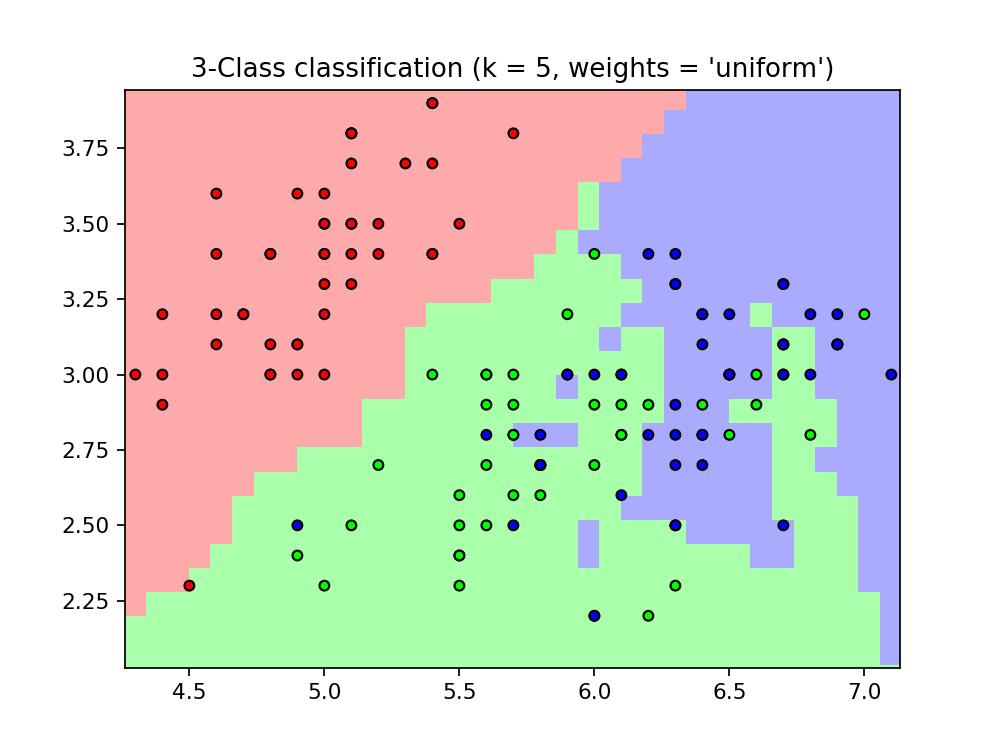

<IPython.core.display.Javascript object>


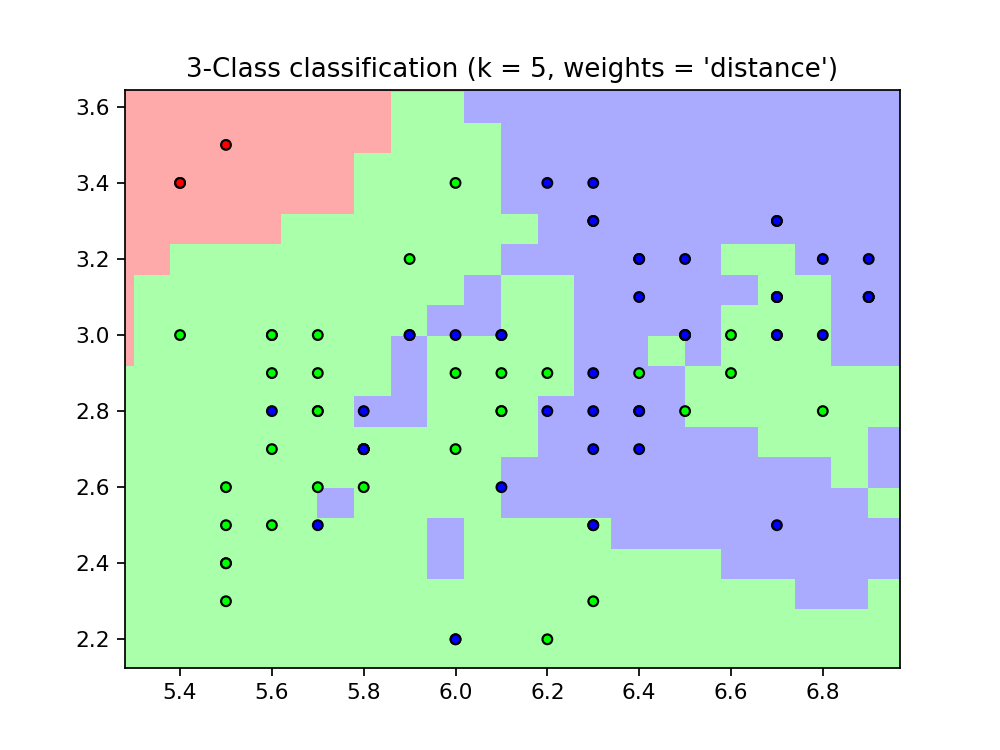

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 5

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .08  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

#### 2.2.3 Decision Trees



#### 2.2.4 Suppor Vector Machines (SVMs)


In [ ]:
from IPython.display import IFrame
IFrame('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', width=300, height=200)

### 2.3 Exercise
Think about a use case for machine learning in your department or domain:
- What question do I want to answer? Typically something you do manually at the moment, or is handeled ineffectively.
- What data set can I use to address the question?
- Is this question really approachable by ML?
- Is is unsupervised, supervised (regression, classification) ML?
- What kind of algorithm would I suggest? (SVM, linear regression, clustering)?

### 2.4 Learning Material 
- Data School Course (Kevin Markham): **Introduction to machine learning with scikit-learn** [Jupyter notebook 6](https://github.com/justmarkham/scikit-learn-videos) and [YouTube videos](https://www.youtube.com/playlist?list=PL5-da3qGB5ICeMbQuqbbCOQWcS6OYBr5A)
- Stanford University professors Trevor Hastie and Rob Tibshirani online course based on their textbook [free PDF](http://www-bcf.usc.edu/~gareth/ISL/), **An Introduction to Statistical Learning with Applications in R (ISLR)**. [ISLR course](https://www.r-bloggers.com/in-depth-introduction-to-machine-learning-in-15-hours-of-expert-videos/)

- MIT course on **Introduction to Computational Thinking and Data Science** ([lectures 9 and 10](https://ocw.mit.edu/courses/electrical-engineering-and-computer-science/6-0002-introduction-to-computational-thinking-and-data-science-fall-2016/lecture-videos/))
